# Первичная обработка данных

Строка документации

In [32]:

## -*- coding: UTF-8 -*-

"""
    Первичный анализ и проверка данных
    Самаркин А.И.
    15/07/2022
    учебный файл
"""


'\n    Первичный анализ и проверка данных\n    Самаркин А.И.\n    15/07/2022\n    учебный файл\n'

### импорт модулей python

In [33]:
import datetime as dt
from genericpath import exists
import statistics as sts

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
import sklearn as sklearn

### чтение данных

In [34]:
hr = "_"*100
now_is = dt.datetime.now()
print(f"Текущая дата и время: {now_is}")

Текущая дата и время: 2022-07-17 23:15:34.431804


Если локальный файл имеется, то считывается локальный файл, если его нет, то считывается файл из репозитория

In [35]:
url = "https://raw.githubusercontent.com/Alex-Samarkin/Reghression-Analysis-Book-2022/main/Ch1%20%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/heart_failure_clinical_records_dataset_orig.csv"
file_name = "local_data.csv"

data : pd.DataFrame

if exists(file_name):
    data = pd.read_csv(file_name)
else:
    data = pd.read_csv(url)
    pass

Если файл считан, то распечатывается его начальные и конечные строки

In [36]:
print(hr)
print(data.head())
print("...")
print(data.tail())
print(hr)
data.to_csv(file_name, index=False)

# в буфер обмена - раскомментируйте следующую строку
# data.to_clipboard()

____________________________________________________________________________________________________
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   

### первичная статистика

In [37]:
print(data.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

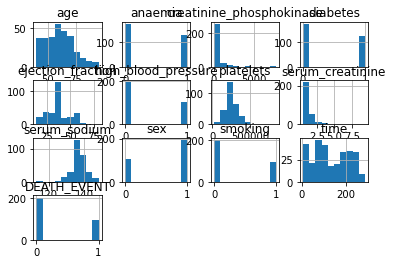

In [38]:
data.hist()
plt.show()

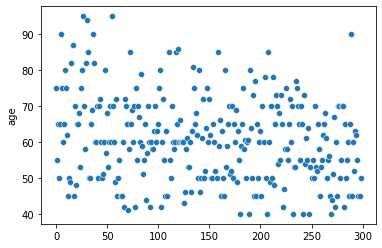

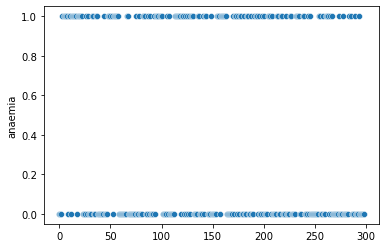

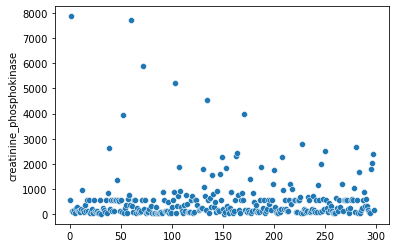

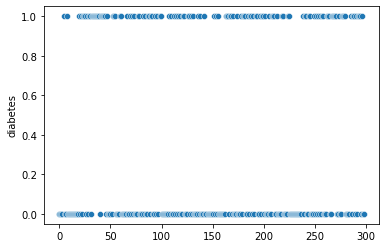

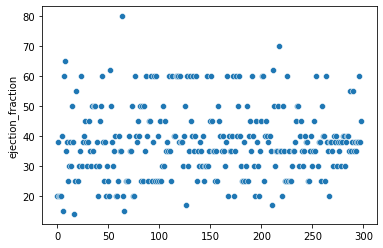

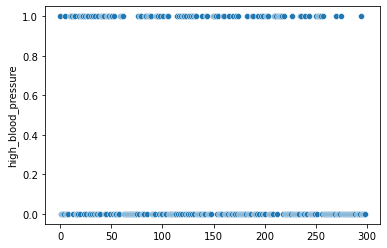

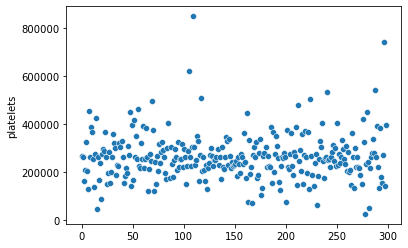

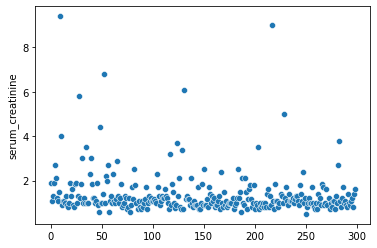

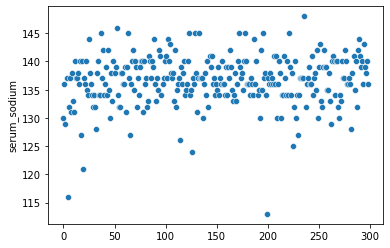

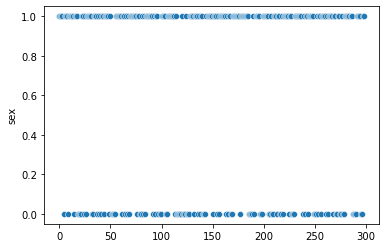

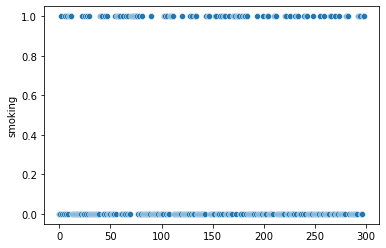

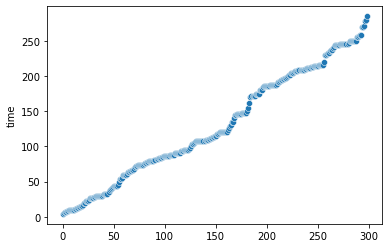

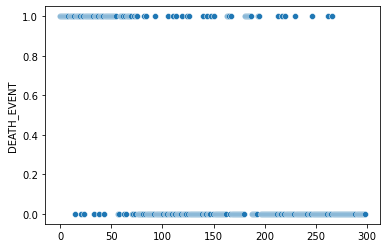

In [39]:
for i in data.columns:
    sns.scatterplot(data=data[i])
    plt.show()

### стандартизация данных

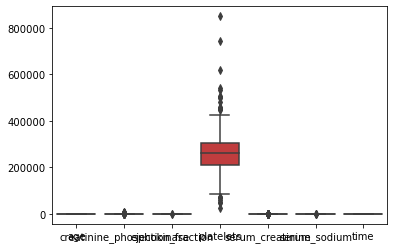

In [40]:
data1 = data.iloc[:,[0,2,4,6,7,8,11]]

sns.boxplot(data=data1)
plt.show()

### стандартизация данных
используется стандартный инструмент маштабирования sklearn

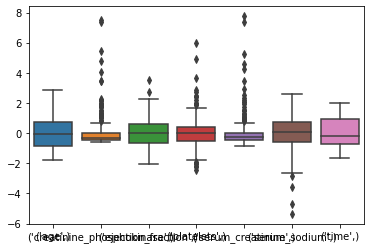

In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(data1.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[data1.columns])
sns.boxplot(data=df_scaled)
plt.show()

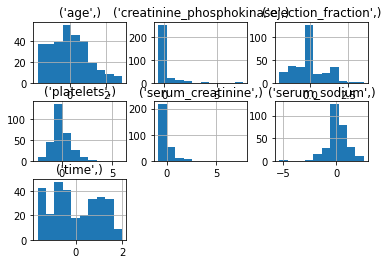

In [42]:
df_scaled.hist()
plt.show()

### преобразование Box-Cox

In [43]:
from sklearn.preprocessing import PowerTransformer

data_np = data1.to_numpy()
col_names = data1.columns;
pt = PowerTransformer()
pt.fit(data_np)
print(pt.lambdas_)

[ 0.02098633 -0.16266777  0.28524377  0.49105691 -2.32485807  7.01021676
  0.64241254]


In [44]:
# pt.transform
data_np = pt.fit_transform(data_np)
data_np = pd.DataFrame(data_np,columns=col_names)

        age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  1.173233                  0.691615          -1.773346   0.110528   
1 -0.423454                  2.401701           0.100914   0.093441   
2  0.434332                 -0.553424          -1.773346  -1.093142   
3 -0.910411                 -0.833885          -1.773346  -0.494713   
4  0.434332                 -0.462335          -1.773346   0.720277   

   serum_creatinine  serum_sodium      time  
0          1.212227     -1.468519 -2.048457  
1         -0.087641     -0.244181 -1.975337  
2          0.381817     -1.642143 -1.941646  
3          1.212227     -0.006503 -1.941646  
4          1.715066     -3.285073 -1.909431  


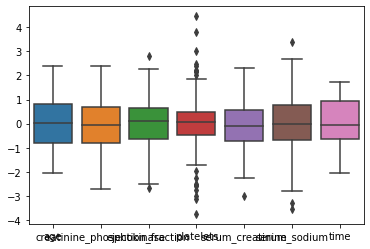

In [45]:
print(data_np.head())
sns.boxplot(data=data_np)
plt.show()

### удаление выбросов

In [46]:
z1 = np.abs(sp.stats.zscore(data1))
z_np = np.abs(sp.stats.zscore(data_np))

out1 = z1[z1>3]
out_np = z_np[z_np>3]

In [47]:
print(hr)
print(out1.head(10))
print(hr)
print(out_np.head(10))

____________________________________________________________________________________________________
   age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  NaN                       NaN                NaN        NaN   
1  NaN                   7.51464                NaN        NaN   
2  NaN                       NaN                NaN        NaN   
3  NaN                       NaN                NaN        NaN   
4  NaN                       NaN                NaN        NaN   
5  NaN                       NaN                NaN        NaN   
6  NaN                       NaN                NaN        NaN   
7  NaN                       NaN                NaN        NaN   
8  NaN                       NaN                NaN        NaN   
9  NaN                       NaN                NaN        NaN   

   serum_creatinine  serum_sodium  time  
0               NaN           NaN   NaN  
1               NaN           NaN   NaN  
2               NaN           NaN   NaN  
3   

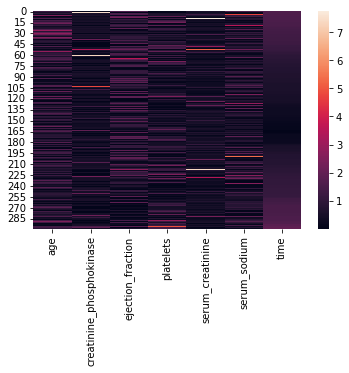

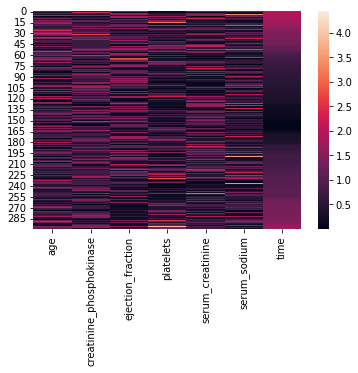

In [48]:
sns.heatmap(z1)
plt.show()
sns.heatmap(z_np)
plt.show()

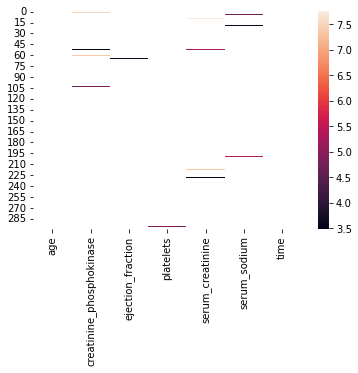

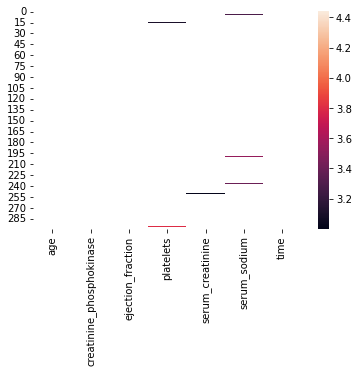

In [49]:
sns.heatmap(out1)
plt.show()
sns.heatmap(out_np)
plt.show()

### поиск аномалий методом изолирующего леса и локальной величины выброса

метод изолирующего леса

In [50]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(data_np)

e:\Alex\anaconda3\envs\med_2022\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


метод локального фактора выбросов

In [51]:
from sklearn.neighbors import LocalOutlierFactor
lout = LocalOutlierFactor(n_neighbors=20)
yhat2 = lout.fit_predict(data_np)

flag   = pd.DataFrame([yhat,yhat2])
flag = flag.T
print( flag.head() )

   0  1
0  1  1
1  1  1
2  1  1
3  1  1
4 -1  1


служебный график, показывает степень совпадения выбросов в каждом из методов

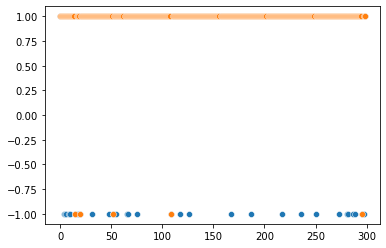

In [52]:
sns.scatterplot(data=yhat)
sns.scatterplot(data=yhat2)
plt.show()

распечатка данных с учетом аномалий

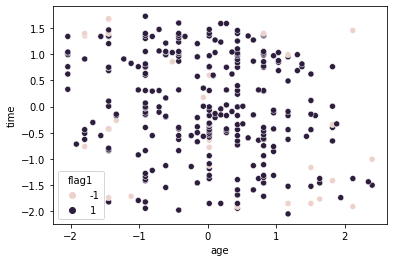

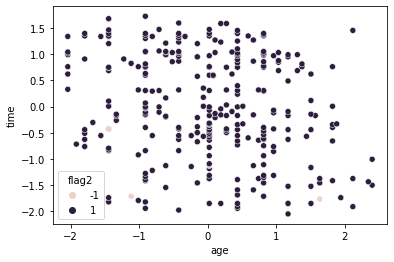

In [53]:
data_np["flag1"] = yhat
data_np["flag2"] = yhat2
sns.scatterplot(data=data_np, x="age", y="time", hue="flag1")
plt.show()
sns.scatterplot(data=data_np, x="age", y="time", hue="flag2")
plt.show()

### расчет коэффициентов корреляции и коэффициентов достоверности

                               age  creatinine_phosphokinase  \
age                       1.000000                 -0.101618   
creatinine_phosphokinase -0.101618                  1.000000   
ejection_fraction         0.063265                 -0.066737   
platelets                -0.061564                  0.010723   
serum_creatinine          0.259712                 -0.063904   
serum_sodium             -0.039632                  0.025269   
time                     -0.221248                  0.109746   

                          ejection_fraction  platelets  serum_creatinine  \
age                                0.063265  -0.061564          0.259712   
creatinine_phosphokinase          -0.066737   0.010723         -0.063904   
ejection_fraction                  1.000000   0.075624         -0.159117   
platelets                          0.075624   1.000000         -0.059707   
serum_creatinine                  -0.159117  -0.059707          1.000000   
serum_sodium                   

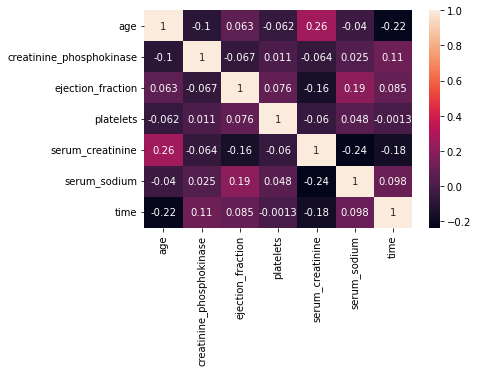

In [54]:
data_np.drop(["flag1","flag2"],axis=1,inplace=True)
r = data_np.corr()

print(r)
sns.heatmap(r,annot=True)
plt.show()

### кластерный анализ

[[ 0.47567161 -0.64033311  0.65308796  0.03864757 -0.07514305  0.54229908
  -0.450719  ]
 [-0.59804888  0.42543872  0.04829533  0.08615256 -0.55264702  0.17639111
   0.62561296]
 [ 0.35755311  0.06163974 -0.7525377  -0.16366333  0.86905183 -0.8198026
  -0.42308934]]


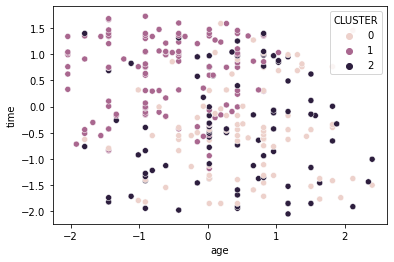

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit_transform(data_np)
data_np["CLUSTER"] = kmeans.labels_
print(kmeans.cluster_centers_)
sns.scatterplot(data=data_np, x="age", y="time", hue="CLUSTER")
plt.show()

### Понижение размерности
#### PCA

[0.23314136 0.17402715 0.141612   0.13226252]
[22.08992659 19.08504164 17.21609439 16.63807249]


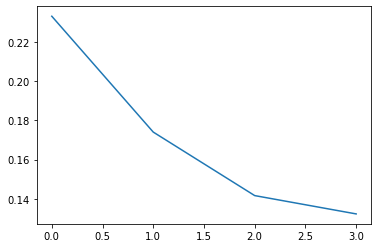

In [56]:
from sklearn.decomposition import PCA
data_np.drop("CLUSTER", axis= 1, inplace= True)

pca = PCA(n_components=4)
pca.fit(data_np)
data_PCA = pca.transform(data_np)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)
plt.plot(pca.explained_variance_ratio_)
plt.show()

#### Factor

In [57]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=3, rotation="varimax")
fa.fit(data_np)
data_fa = fa.transform(data_np)
print(fa.components_.T)

[[ 0.50673723 -0.19213837  0.24424484]
 [-0.12423046  0.09797062 -0.15542915]
 [-0.03818441 -0.52147984 -0.05729546]
 [-0.10990803 -0.08075745  0.02806297]
 [ 0.56558206  0.25769789  0.08863949]
 [-0.22745009 -0.36576088 -0.04375346]
 [-0.19747932 -0.0771819  -0.53856135]]


## Спасибо за внимание